# Laboratorio 9: DEFINICIÓN. ENFOQUE CONCEPTUAL. RELAJACIÓN DEL PROBLEMA DE PL.ENFOQUE GRÁFICO. MÉTODO DE RAMIFICACIÓN

## Integrantes:

- Aranda Huerta, Milene Natalia
- Escriba Flores, Daniel Agustin

---

In [20]:
## Importamos las librerias necesarias 
import pulp
import matplotlib.pyplot as plt
import numpy as np
import mip
from shapely.geometry import LineString


# ================================
import warnings
warnings.filterwarnings('ignore')

---

## PROBLEMATICA

Una empresa produce azúcar de dos tipos: rubia y blanca. Para fabricar un lote de azúcar rubia se necesitan 2 toneladas de insumos químicos y para un lote de azúcar blanca, 5 toneladas de insumos químicos. Además, es necesario 6 y 5 toneladas de caña de azúcar, respectivamente, para fabricar un lote de azúcar rubia y uno de blanca. La máxima disponibilidad diaria de insumos químicos es 16 toneladas y de caña de azúcar, 27 toneladas. El ingreso, en miles de soles, por cada lote de azúcar rubia es 2 y por cada lote de azúcar blanca, 3. Luego de escribir el problema de programación lineal entera que maximice el ingreso, haga lo siguiente:



Variables de decision:

$x$ : número de lotes de azucar Rubia    
$y$ : número de lotes de azucar Blanca   




Maximizar $z = 2x + 3y$ 

sujeto a   

$2x + 5y <= 16$  
$6x + 5y <= 22$  

---

## Parte A

Resuelva el problema de programación lineal entera haciendo uso de la librería ‘PuLP’.

In [21]:
problema = pulp.LpProblem("Beneficio",pulp.LpMaximize)
problema

Beneficio:
MAXIMIZE
None
VARIABLES

In [22]:
# Variables de decisión
x = pulp.LpVariable("x",lowBound=0,cat='Integer') 
y = pulp.LpVariable("y",lowBound=0,cat='Integer') 

# Función objetivo
problema += 2*x + 3*y

# Restricciones
problema += 2*x + 5*y <= 16
problema += 6*x + 5*y <= 27

In [23]:
sol = problema.solve()
sol

1

In [24]:
print("z_max = {0:.1f}, x = {1:.1f}, y = {2:.1f}".
      format(pulp.value(problema.objective),pulp.value(x),pulp.value(y)))

z_max = 10.0, x = 2.0, y = 2.0


---

## Parte B

Resuelva el problema de programación lineal entera haciendo uso de la librería ‘MIP’.

In [25]:
problema = mip.Model("Beneficio")
problema

In [26]:
# Variables de decisión
x = [problema.add_var(var_type=mip.INTEGER) for i in range(1)]
y = [problema.add_var(var_type=mip.INTEGER) for i in range(1)]

# Función objetivo
problema.objective = mip.maximize(2*x[0] + 3*y[0])

# Restricciones
problema += 2*x[0] + 5*y[0] <= 16
problema += 6*x[0] + 5*y[0] <= 27

In [27]:
sol = problema.optimize()
sol

<OptimizationStatus.OPTIMAL: 0>

In [28]:
print("z_max = {0:.1f}, x = {1:.1f}, y = {2:.1f}".
      format(problema.objective_value,x[0].x,y[0].x))

z_max = 10.0, x = 2.0, y = 2.0


---

## Parte C

Realice el gráfico de la región factible e indique cuántos pares ordenados forman parte de esta.

In [29]:
# Ecuaciones e intervalos para tabular
x = np.arange(-1, 10, 1)
y = np.arange(-2, 10, 1)
y1 = (16 - 2*x)/5
y2 = (27 - 6*x)/5
x1 = 0*y
y3 = 0*x

In [30]:
# Identificadores para las líneas
primera_linea = LineString(np.column_stack((x, y1)))
segunda_linea = LineString(np.column_stack((x, y2)))
tercera_linea = LineString(np.column_stack((x, y3)))
cuarta_linea = LineString(np.column_stack((x1, y)))

In [31]:
# Generando las intersecciones (vértices)
primera_interseccion = primera_linea.intersection(cuarta_linea)
segunda_interseccion = cuarta_linea.intersection(tercera_linea)
tercera_interseccion = tercera_linea.intersection(segunda_linea)
cuarta_interseccion = segunda_linea.intersection(primera_linea)

In [32]:
#Identificando los valores de las coordenadas x e y de cada vertice

xi1m, yi1m = primera_interseccion.xy
xi2m, yi2m = segunda_interseccion.xy
xi3m, yi3m = tercera_interseccion.xy
xi4m, yi4m = cuarta_interseccion.xy

In [33]:
# Cambiamos el formato de matriz a float
xi1 = np.float64(np.array(xi1m))
xi2 = np.float64(np.array(xi2m))
xi3 = np.float64(np.array(xi3m))
xi4 = np.float64(np.array(xi4m))
yi1 = np.float64(np.array(yi1m))
yi2 = np.float64(np.array(yi2m))
yi3 = np.float64(np.array(yi3m))
yi4 = np.float64(np.array(yi4m))

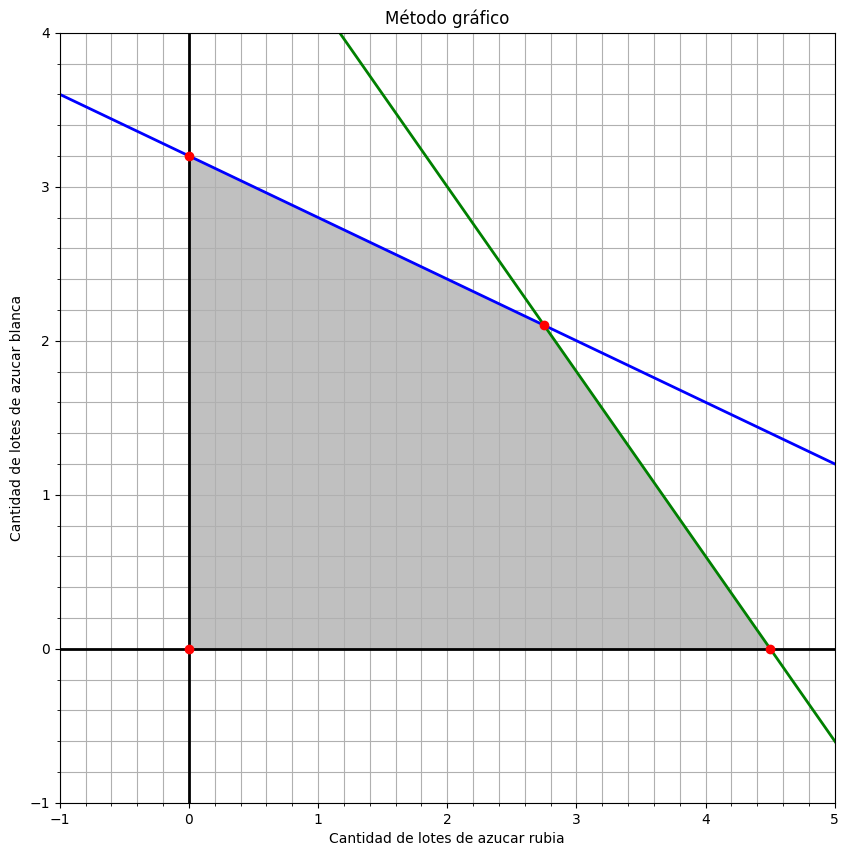

In [34]:
# Graficando la región factible del PLR
m = [xi1, xi2, xi3, xi4]
n = [yi1, yi2, yi3, yi4]
plt.figure(figsize=(10,10))
plt.plot(x, y1, '-', linewidth=2, color='blue')
plt.plot(x, y2, '-', linewidth=2, color='green')
plt.plot(x, y3, '-', linewidth=2, color='black')
plt.plot(x1, y, '-', linewidth=2, color='black')

plt.plot(*primera_interseccion.xy, 'o', color='red')
plt.plot(*segunda_interseccion.xy, 'o', color='red')
plt.plot(*tercera_interseccion.xy, 'o', color='red')
plt.plot(*cuarta_interseccion.xy, 'o', color='red')

plt.fill(m, n, color='silver')
plt.minorticks_on()
plt.grid(which='both')
plt.xlim(-1,5)
plt.ylim(-1,4)
plt.xlabel('Cantidad de lotes de azucar rubia')
plt.ylabel('Cantidad de lotes de azucar blanca')
plt.title('Método gráfico')
plt.show()

In [35]:
# Imprimiendo las coordenadas de los vértices
print('COORDENADAS DE LAS INTERSECCIONES \n')
print('(x1, y1): {} '.format(primera_interseccion))
print('(x2, y2): {} '.format(segunda_interseccion))
print('(x3, y3): {} '.format(tercera_interseccion))
print('(x4, y4): {} '.format(cuarta_interseccion))

COORDENADAS DE LAS INTERSECCIONES 

(x1, y1): POINT (0 3.2) 
(x2, y2): POINT (0 0) 
(x3, y3): POINT (4.5 0) 
(x4, y4): POINT (2.75 2.1) 


In [36]:
# Generando los pares ordenados enteros
x0i = np.arange(0,5,1)
y0i = np.zeros(5)
x1i = np.arange(0,4,1)
y1i = np.zeros(4) + 1
x2i = np.arange(0,3,1)
y2i = np.zeros(3) + 2
x3i = np.arange(0,1,1)
y3i = np.zeros(1) + 3

## Total de puntos
tp = len(x0i) + len(x1i) + len(x2i) + len(x3i)

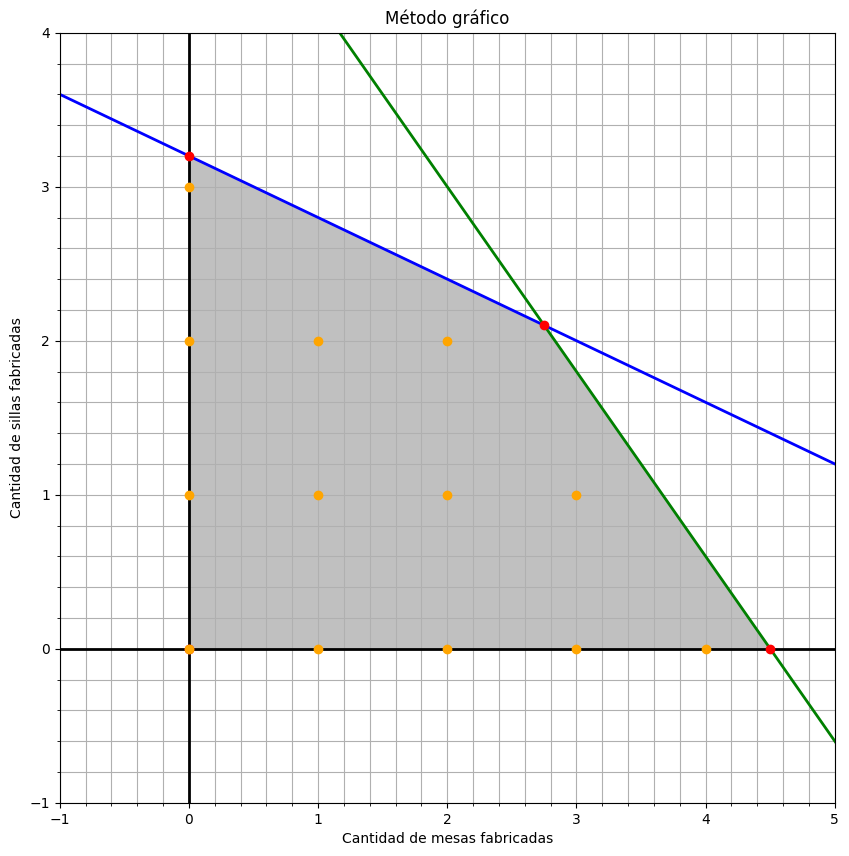

In [37]:
# Graficando la región factible del PLE
m = [xi1, xi2, xi3, xi4]
n = [yi1, yi2, yi3, yi4]
plt.figure(figsize=(10,10))
plt.plot(x, y1, '-', linewidth=2, color='blue')
plt.plot(x, y2, '-', linewidth=2, color='green')
plt.plot(x, y3, '-', linewidth=2, color='black')
plt.plot(x1, y, '-', linewidth=2, color='black')

plt.plot(*primera_interseccion.xy, 'o', color='red')
plt.plot(*segunda_interseccion.xy, 'o', color='red')
plt.plot(*tercera_interseccion.xy, 'o', color='red')
plt.plot(*cuarta_interseccion.xy, 'o', color='red')

plt.plot(x0i, y0i, 'o', color='orange')
plt.plot(x1i, y1i, 'o', color='orange')
plt.plot(x2i, y2i, 'o', color='orange')
plt.plot(x3i, y3i, 'o', color='orange')


plt.xlim(-1,5)
plt.ylim(-1,4)
plt.fill(m, n, color='silver')
plt.minorticks_on()
plt.grid(which='both')
plt.xlabel('Cantidad de mesas fabricadas')
plt.ylabel('Cantidad de sillas fabricadas')
plt.title('Método gráfico')
plt.show()

In [38]:
print("Cantidad de pares ordenados : ", tp )

# Concatenar arreglos
x = np.concatenate((x0i, x1i, x2i, x3i))
y = np.concatenate((y0i, y1i, y2i, y3i))
y = y.astype(int)

print("\nlos cuales son:")
# Imprimir pares ordenados
for i in range(len(x)):
    print(f"({x[i]}, {y[i]})", end=" ")


Cantidad de pares ordenados :  13

los cuales son:
(0, 0) (1, 0) (2, 0) (3, 0) (4, 0) (0, 1) (1, 1) (2, 1) (3, 1) (0, 2) (1, 2) (2, 2) (0, 3) 

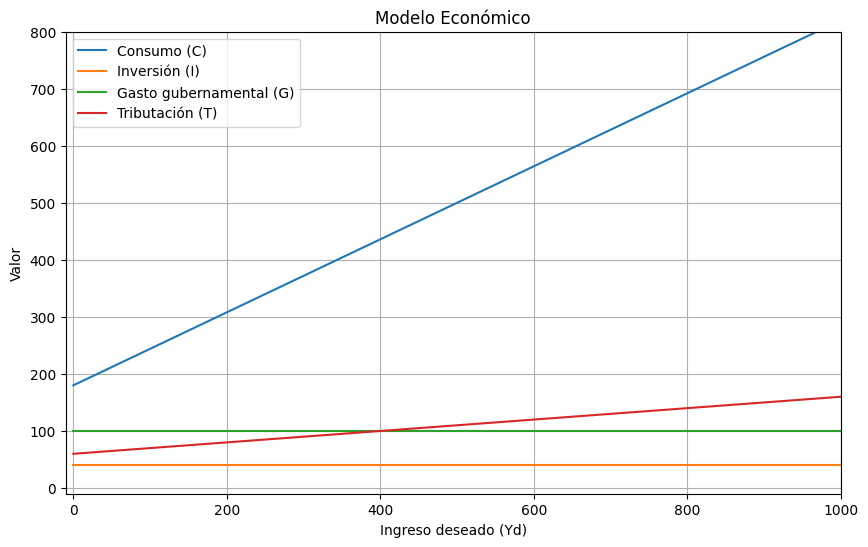

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Definir rango de ingresos deseados (Yd)
Yd = np.linspace(0, 1000, 100)

# Consumo (C)
C = 180 + 0.64 * Yd

# Inversión (I)
I = 40 * np.ones(len(Yd))

# Gasto gubernamental (G)
G = 100 * np.ones(len(Yd))

# Tributación (T)
T = 60 + 0.1 * Yd

# Graficar

plt.figure(figsize=(10, 6))
plt.plot(Yd, C, label='Consumo (C)')
plt.plot(Yd, I, label='Inversión (I)')
plt.plot(Yd, G, label='Gasto gubernamental (G)')
plt.plot(Yd, T, label='Tributación (T)')
plt.xlabel('Ingreso deseado (Yd)')
plt.ylabel('Valor')
plt.title('Modelo Económico')
plt.xlim(-10,1000)
plt.ylim(-10,800)
plt.legend()
plt.grid(True)
plt.show()
